In [7]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from utils.plot_utils import plot_iterations, plot_cobweb

# General framework for a map, iterating a map and visualize iteration results

A `map`, `function` or `rule` is a `system` that in general has:
- some system `properties` defined by a set of parameters $P$ and
- a system `state` defined by a set of variables $V$

where the output, $V' = F(P, V)$

**Note** that the number of parameters $P$ and number of variables $V$ can be different for different maps.

## Iterate
The basic idea of a `iterated map` is to define a set of variables $V_{t=0}$ as `initial condition`, and then in a sequence of $n$ steps to update this set $V_{t}$ according to a fixed rule or map $V_{t+1} = F(P, V_{t})$ to obtain a `trajectory` to obtain: $T_{n}=[V_{t=0}, V_{t=1}, ..., V_{t=n-1}]$


In [8]:
def iterate(map: Callable, P: dict, V: dict=None, n=0) -> dict:

    if not V or n<1:
        return {}    
    else:
        # init trajectories with start value at t=0
        T = { key: [value] for key, value in V.items()}
        for _ in range(n-1):
            V_hat = map(P, V)
            for key, value in V_hat.items():
                T[key].append(value)
            V = V_hat
        return T

The whole history or trajectory becomes available by this process of functional iteration - a `feedback-loop`, where the results of each timestep are input for the next timestep.

## Logistic map
The logistic map has one parameter $r$, the reproduction rate and one variable $x$ the relative population size. These are set as parameters and variables by:
- $P$ = {'$r$': \<SOME NUMBER>\}
- $V$ = {'$x$': \<SOME NUMBER>\}

Using the `iterate` method as trajectory `V_hat` is calculated and using the `plot_iterations` method the trajectory 'V_hat' is visualized.


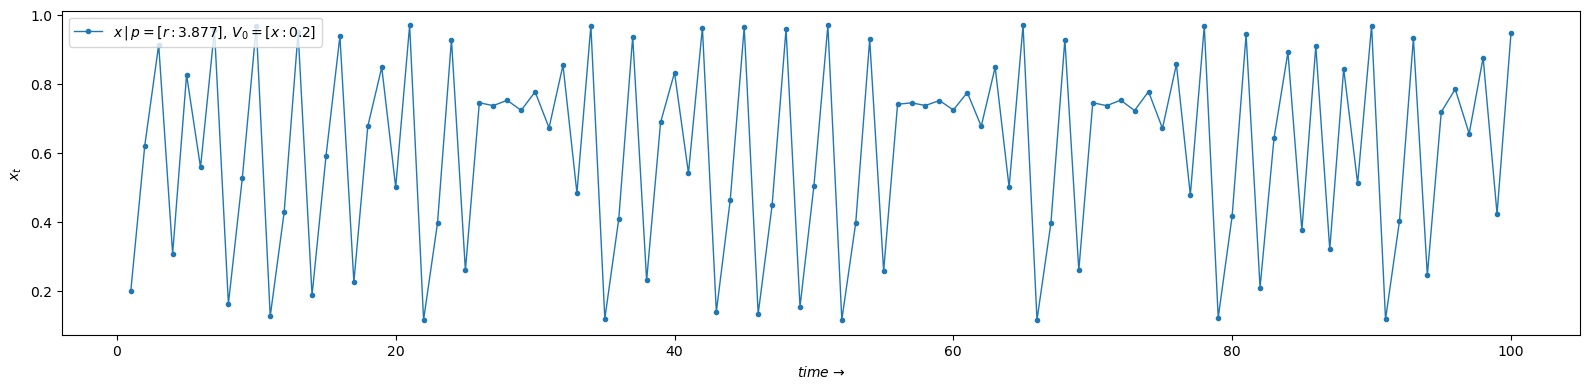

In [9]:
def logistic_map(P: dict, V: dict) -> dict:
    """The implementation of a relative population system with:
    -  parameters `P: ['r'] and,
    -  variables `V: ['x']`,
    that maps to the output variable v_hat['x']`
    """
    r = P['r']  # reproduction rate
    x = V['x']  # relative population size

    x_hat = r * x * (1 - x)

    return {'x': x_hat}


P={'r': 3.8768}

x0 = 0.2
V={'x':x0}

V_hat = iterate(logistic_map, P, V, n=100)
plot_iterations(P, V_hat)

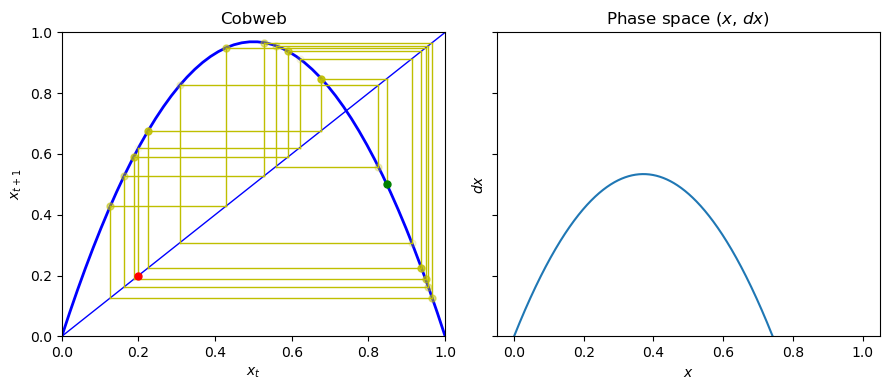

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

V_hat = iterate(logistic_map, P, V, n=20)

plot_cobweb(logistic_map, P, V_hat, ax=ax1)


V_map = {'x': np.linspace(0.0,1.0,1000)}
v_map = V_map['x']
V_map_hat = logistic_map(P, V_map) 
v_map_dx = V_map_hat['x'] - v_map

ax2.plot(v_map, v_map_dx)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$dx$')
ax2.set_title('Phase space ($x$, $dx$)')
plt.tight_layout()

## Predator Prey model

The same holds for other maps. Here a predator-prey map with more parameters $P$ and two variables $V$: $x$ (preys) and $y$ (predators) is defined:

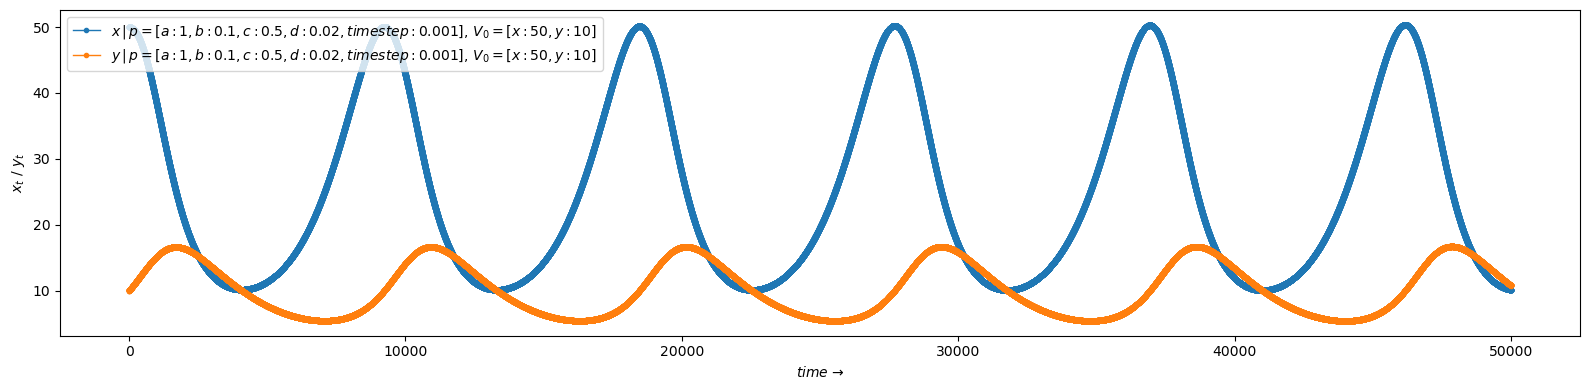

In [11]:
def pred_prey_map(P: dict, V: dict) -> dict:
    """
    The implementation of a predator prey system with parameters `P` and variables `V`.

    Parameters `P`: [a, b, c, d, timestep] with:
    - a: birth rate of rabbits
    - b: death rate of rabbits due to predation
    - c: natural death rate of foxes
    - d: factor that describes how many eaten rabbits give birth to a new fox
    - timestep: the time increment for this differential equation

    Variables `V`: [x, y]` with:
    - x: number of rabbits
    - y: number of foxes
    
    Output `V_hat`: [x, y]`.
    """
    
    # Parameter setup
    a = P['a']
    b = P['b']
    c = P['c']
    d = P['d']
    timestep = P['timestep']
    
    # Map the states into local variable names
    x = V['x']
    y = V['y']

    # evaluate the current differentials
    x_hat = x + (x * (a - b * y)) * timestep
    y_hat = y + (-y * (c - d * x)) * timestep

    return {'x': x_hat, 'y': y_hat}


# initial conditions for the rabbit (x) and fox (y)
x0 = 50 # rabbits
y0 = 10 # foxes
V = {'x': x0, 'y':y0}

# definition of lotka-volterra parameters
a = 1     # birth rate of rabbits
b = 0.1   # death rate of rabbits due to predation
c = 0.5   # natural death rate of foxes
d = 0.02  # factor that describes how many eaten rabbits give birth to a new fox

timestep = 0.001
n = 50

P = {'a':a, 'b':b, 'c':c ,'d':d, 'timestep':timestep}


V_hat = iterate(pred_prey_map, P, V, n=int(n/timestep))

plot_iterations(P, V_hat)


### Phase plot
For the predator-prey model of foxes and rabbits a plot of the `Phase space` shows the population sizes revolve in a repeating cycle, a `limit cycle`.

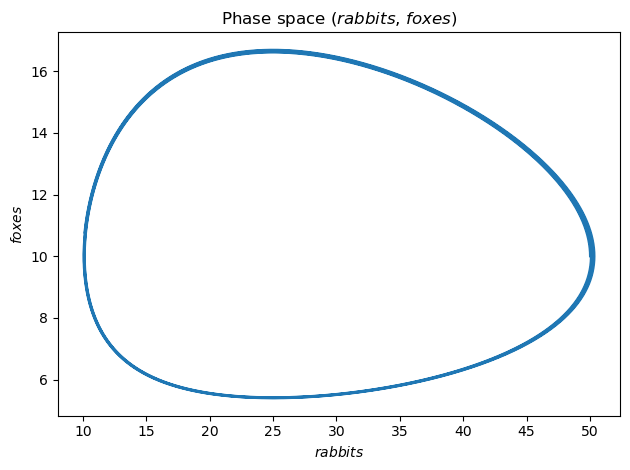

In [12]:
plt.plot(V_hat['x'],V_hat['y'])
plt.xlabel('$rabbits$')
plt.ylabel('$foxes$')
plt.title('Phase space ($rabbits$, $foxes$)')
plt.tight_layout()